In [4]:
import pandas as pd 
import numpy as np 


In [5]:
df = pd.read_csv('D:\\Python\\pandas\\Lesson_13\\tips.csv')

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1.2. Add a column name tip_pct, and get tip precentage of final bill by dividing the column tip by the column total_bill.

In [7]:
df['tip_pct'] = df['tip']/df['total_bill'] * 100

In [8]:
df


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


2. What is the average tip % given by smoker / non-smoker women / men? (hint: use agg function)

In [9]:
import numpy as np

3. Use the same agg function to compute both the mean and the std. What is the format (type) of the output?

In [10]:
mean_tip_pct = df.groupby(['sex','smoker']).tip_pct.agg([np.mean, np.std])
mean_tip_pct.round(2)

mean   std
sex    smoker             
Female No      15.69  3.64
       Yes     18.22  7.16
Male   No      16.07  4.18
       Yes     15.28  9.06

In [11]:
# Same as the former:
mean_tip_pct1 = df.groupby(['sex','smoker']).agg(
    mean_tips=pd.NamedAgg(column='tip_pct', aggfunc='mean'),
    std_tips=pd.NamedAgg(column='tip_pct', aggfunc='std'))
mean_tip_pct1.round(2)

mean_tips  std_tips
sex    smoker                     
Female No          15.69      3.64
       Yes         18.22      7.16
Male   No          16.07      4.18
       Yes         15.28      9.06

4. Compute the same three statistics 'count', 'mean' and 'max' for the tip_pct and total_bill columns. How many columns you'll get?

In [22]:
grouped = df.groupby(['sex','smoker'])
function = ['count', 'mean', 'max']
result = grouped.agg({
    'tip_pct': {function},
    'total_bill': {function}
})
result

ValueError: too many values to unpack (expected 2)

In [14]:
grouped = df.groupby(['sex','smoker'])
function = {'tip_pct': {
               'count', 'mean', 'max'}, 
             'total_bill': {
                 'count', 'mean', 'max'}}
result = grouped.agg(function)
grouped.agg(function)
result

tip_pct                  total_bill             
                    mean count        max       mean count    max
sex    smoker                                                    
Female No      15.692097    54  25.267250  18.105185    54  35.83
       Yes     18.215035    33  41.666667  17.977879    33  44.30
Male   No      16.066872    97  29.198966  19.791237    97  48.33
       Yes     15.277118    60  71.034483  22.284500    60  50.81

4.3. The resulting DataFrame has hierarchical columns. However, the number of columns is niether 8 nor 2. Compute the length of result columns.    # TODO ??????????????????

In [24]:

df.groupby(['sex','smoker']).agg({'tip_pct': ['count', 'mean', 'max'],'total_bill': ['count', 'mean', 'max']})

tip_pct                       total_bill                  
                count       mean        max      count       mean    max
sex    smoker                                                           
Female No          54  15.692097  25.267250         54  18.105185  35.83
       Yes         33  18.215035  41.666667         33  17.977879  44.30
Male   No          97  16.066872  29.198966         97  19.791237  48.33
       Yes         60  15.277118  71.034483         60  22.284500  50.81

5. Compute the statistics 'min','max', 'mean' and 'std' for the tip_pct column and 'sum' for the 'size' column.

In [25]:
df.groupby(['sex','smoker']).agg({
            'tip_pct': {
               'min',  'max', 'mean', 'std'}, 
             'size': 'sum'})

tip_pct                                size
                    mean       std       min        max  sum
sex    smoker                                               
Female No      15.692097  3.642118  5.679667  25.267250  140
       Yes     18.215035  7.159451  5.643341  41.666667   74
Male   No      16.066872  4.184875  7.180385  29.198966  263
       Yes     15.277118  9.058794  3.563814  71.034483  150

6. Select the top 5 generous smokers and non-smpkers

In [49]:
#  6.1. Build a function top which attributes df, n (for the top n) and column. In this function use sort_values to sort the values in the column specified.

def top(df, column, n):
    df_sorted = df.sort_values(by=column, ascending=False)
    print(df_sorted.head(n))




In [50]:
# 6.2. Group the tips dataframe by 'smoker and use apply(top) to apply this function.
smoker = df.groupby('smoker')
smoker.apply(top, 'tip', 5)


     total_bill   tip   sex smoker   day    time  size    tip_pct
212       48.33  9.00  Male     No   Sat  Dinner     4  18.621974
23        39.42  7.58  Male     No   Sat  Dinner     4  19.228818
59        48.27  6.73  Male     No   Sat  Dinner     4  13.942407
141       34.30  6.70  Male     No  Thur   Lunch     6  19.533528
47        32.40  6.00  Male     No   Sun  Dinner     4  18.518519
     total_bill    tip     sex smoker  day    time  size    tip_pct
170       50.81  10.00    Male    Yes  Sat  Dinner     3  19.681165
183       23.17   6.50    Male    Yes  Sun  Dinner     4  28.053517
214       28.17   6.50  Female    Yes  Sat  Dinner     3  23.074192
181       23.33   5.65    Male    Yes  Sun  Dinner     2  24.217745
211       25.89   5.16    Male    Yes  Sat  Dinner     4  19.930475


""


7. Show the count, mean, std, min, max, 25%, 50% and 75% percentiles of the tip_pct of smokers and non-smokers¶

In [52]:
df.groupby('smoker')['tip_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,15.932846,3.990977,5.679667,13.690561,15.562472,18.501403,29.198966
Yes,93.0,16.319604,8.511920,3.563814,10.677083,15.384615,19.505852,71.034483


In [54]:
my_result = df.groupby('smoker')['tip_pct'].describe()
my_result.unstack('smoker').round(2)                         # unstack changes the look....

       smoker
count  No        151.00
       Yes        93.00
mean   No         15.93
       Yes        16.32
std    No          3.99
       Yes         8.51
min    No          5.68
       Yes         3.56
25%    No         13.69
       Yes        10.68
50%    No         15.56
       Yes        15.38
75%    No         18.50
       Yes        19.51
max    No         29.20
       Yes        71.03
dtype: float64

# Pivot Table

8. Use pivot_table function on the rows sex and smoker.

In [56]:
pivotT = df.pivot_table(index=['sex', 'smoker'])
pivotT

size       tip    tip_pct  total_bill
sex    smoker                                           
Female No      2.592593  2.773519  15.692097   18.105185
       Yes     2.242424  2.931515  18.215035   17.977879
Male   No      2.711340  3.113402  16.066872   19.791237
       Yes     2.500000  3.051167  15.277118   22.284500

9. Use pivot_table to show the tip_pct(=values) when the columns are the days, the index are sex and smoker or non-smoker(=to groupby) and the values are the number of values in each day.

In [64]:
df.pivot_table(values='tip_pct', index=['sex', 'smoker'], columns='day',  aggfunc=len, margins=True)   # calculation the NUMBER OF VALUES in each day!!(=len)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

# Visualization of data frames

## crosstab

10. Use pd.crosstab where the days are the indexes and the size are in the columns. How many 1 and 6 person party are there?

In [83]:
party_counts = pd.crosstab(df['day'], df['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [124]:
party_counts.sum(0)   # sums the values per column  

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

11. Filter out 1 and 6 person parties as there are not many of them

In [107]:
my_new_df = party_counts.loc[:, 2:5]
my_new_df 

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [108]:
my_new_df['sum'] = my_new_df.sum(1)
my_new_df 

<ipython-input-108-d2e08502241e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_new_df['sum'] = my_new_df.sum(1)


size,2,3,4,5,sum
day,,,,,
Fri,16,1,1,0,18
Sat,53,18,13,1,85
Sun,39,15,18,3,75
Thur,48,4,5,1,58


12. Normalize the new df so that each row sums to 1 and make a stacked bar plot

In [110]:

my_new_df = my_new_df.div(my_new_df['sum'], axis=0)  # devide each value with the value in ()
my_new_df

size,2,3,4,5,sum
day,,,,,
Fri,0.888889,0.055556,0.055556,0.000000,1.0
Sat,0.623529,0.211765,0.152941,0.011765,1.0
Sun,0.520000,0.200000,0.240000,0.040000,1.0
Thur,0.827586,0.068966,0.086207,0.017241,1.0


12.2. Use df.plot function, with kind=bar and stacked=True

<AxesSubplot:xlabel='day'>

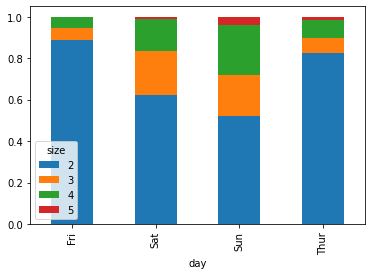

In [125]:
import matplotlib.pyplot as plt
my_new_df.iloc[:, 0:-1].plot.bar(stacked=True)      # stack the results in one bar per day

13. Make a histogram (with 50 bins) of tip percentages of the total bill¶

In [126]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<AxesSubplot:ylabel='Frequency'>

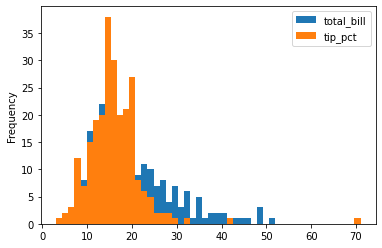

In [131]:
df.plot.hist(y=['total_bill', 'tip_pct'], bins=50)

14. Use plot function with kind='kde' to make a density plot (of the tips %) using the standard mixture-of-normals KDE

<AxesSubplot:ylabel='Density'>

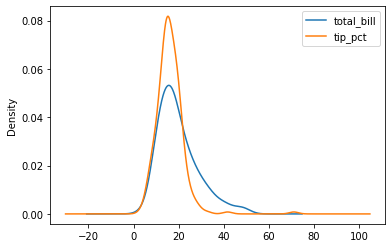

In [133]:
# Generate Kernel Density Estimate plot using Gaussian kernels
df.plot.kde(y=['total_bill', 'tip_pct'])